In [60]:
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt
import h5py
from numpy import linalg as LA

## Compare denoise results on STO

In [97]:
output_python = np.load('C:/Users/Chenyu/Documents/GitHub/tensor_svd/tensor_svd/STO_1000FPS_denoised_python.npy')
output_matlab = sio.loadmat('D:/2020/TensorSVD/ManuscriptRelated/SimulationData/DenoiseOutput_fullsize/STO/Simulation_tensor_STO_slice_5_1000FPS_fullsize.mat')
output_matlab = output_matlab['est_HOOI']

In [98]:
diff_relative = (output_python - output_matlab)/output_matlab

In [99]:
np.amax(diff_relative)

0.00011878996247294243

Text(0.5, 1.0, 'Absolute Difference')

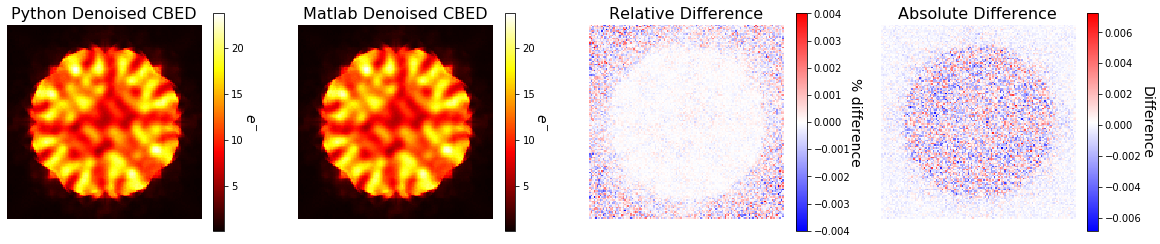

In [102]:
fig = plt.figure(figsize=(20,4))
plt.subplot(141)
plt.imshow(output_python[50,60,:].reshape(128,128),cmap='hot')
cbar = plt.colorbar()
cbar.set_label('$e^{-}$',rotation=270,fontsize=14, labelpad = 12)
plt.axis('off')
plt.title('Python Denoised CBED',fontsize=16)

plt.subplot(142)
plt.imshow(output_matlab[50,60,:].reshape(128,128),cmap='hot')
cbar = plt.colorbar()
plt.axis('off')
cbar.set_label('$e^{-}$',rotation=270,fontsize=14, labelpad = 12)
plt.title('Matlab Denoised CBED',fontsize=16)

plt.subplot(143)
plt.imshow(diff_relative[50,60,:].reshape(128,128)*100,cmap='bwr',clim=[-0.004,0.004])
plt.axis('off')
cbar = plt.colorbar()
cbar.set_label('% difference',rotation=270,fontsize=14, labelpad = 12)
plt.title('Relative Difference', fontsize=16)

plt.subplot(144)
plt.imshow((output_python - output_matlab)[50,60,:].reshape(128,128)*100,cmap='bwr')
plt.axis('off')
cbar = plt.colorbar()
cbar.set_label('Difference',rotation=270,fontsize=14, labelpad = 12)
plt.title('Absolute Difference', fontsize=16)

## Compare denoise results on Si dislocation

In [11]:
output_python = np.load('C:/Users/Chenyu/Documents/GitHub/tensor_svd/tensor_svd/SiDisl_1000FPS_denoised_python.npy')
output_matlab = sio.loadmat('D:/2020/TensorSVD/ManuscriptRelated/SimulationData/DenoiseOutput_fullsize/SiDislocation/Simulation_tensor_SiDisl_slc5_1000FPS.mat')
output_matlab = output_matlab['est_HOOI']

In [12]:
diff_relative = (output_python - output_matlab)/output_matlab

In [95]:
np.amax(output_matlab[50,60,:])

32.486164546245725

Text(0.5, 1.0, 'Absolute Difference')

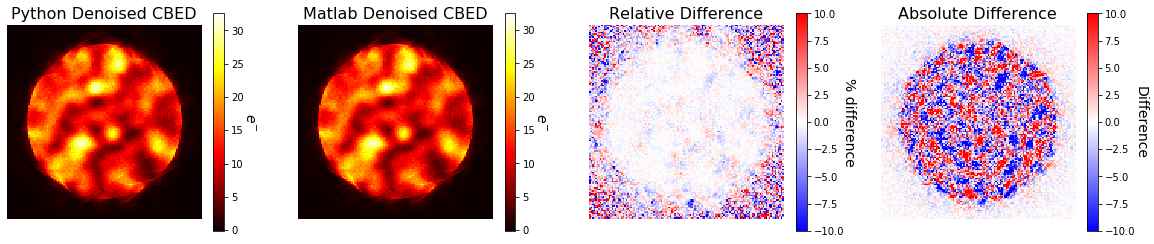

In [96]:
fig = plt.figure(figsize=(20,4))
plt.subplot(141)
plt.imshow(output_python[50,60,:].reshape(128,128),cmap='hot')
cbar = plt.colorbar()
cbar.set_label('$e^{-}$',rotation=270,fontsize=14, labelpad = 12)
plt.axis('off')
plt.title('Python Denoised CBED',fontsize=16)

plt.subplot(142)
plt.imshow(output_matlab[50,60,:].reshape(128,128),cmap='hot')
cbar = plt.colorbar()
plt.axis('off')
cbar.set_label('$e^{-}$',rotation=270,fontsize=14, labelpad = 12)
plt.title('Matlab Denoised CBED',fontsize=16)

plt.subplot(143)
plt.imshow(diff_relative[50,60,:].reshape(128,128)*100,cmap='bwr',clim=[-10,10])
plt.axis('off')
cbar = plt.colorbar()
cbar.set_label('% difference',rotation=270,fontsize=14, labelpad = 12)
plt.title('Relative Difference', fontsize=16)

plt.subplot(144)
plt.imshow((output_python - output_matlab)[50,60,:].reshape(128,128)*100,cmap='bwr',clim=[-10,10])
plt.axis('off')
cbar = plt.colorbar()
cbar.set_label('Difference',rotation=270,fontsize=14, labelpad = 12)
plt.title('Absolute Difference', fontsize=16)

## Compare SVD result on a random matrix

In [22]:
path = 'C:/Users/Chenyu/Documents/GitHub/tensor_svd/tensor_svd/'
e_truth = np.load(path + 'e_truth.npy')
e_truth = np.sqrt(e_truth[0:10])
e_matlab = np.load(path + 'e_matlab.npy')
e_matlab = np.diag(e_matlab)
e_matlab = np.sqrt(e_matlab)
e_randsvd = np.load(path + 'e_randsvd.npy')

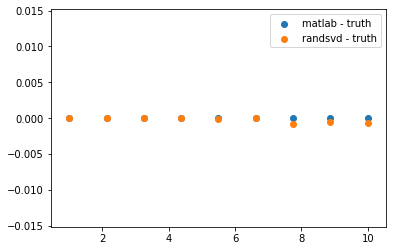

In [51]:
# plt.scatter(np.linspace(1,10,9),e_truth[1::])
plt.scatter(np.linspace(1,10,9),e_matlab[1::] - e_truth[1::],label='matlab - truth')
plt.scatter(np.linspace(1,10,9),e_randsvd[1::] - e_truth[1::],label = 'randsvd - truth')
plt.legend()

In [55]:
path = 'C:/Users/Chenyu/Documents/GitHub/tensor_svd/tensor_svd/'
U_truth = np.load(path + 'U_truth.npy')
U_truth = U_truth[:,0:10]
U_matlab = np.load(path + 'U_matlab.npy')
U_randsvd = np.load(path + 'U_randsvd.npy')

In [85]:
LA.norm(U_matlab[:,i])

1.0000000000000009

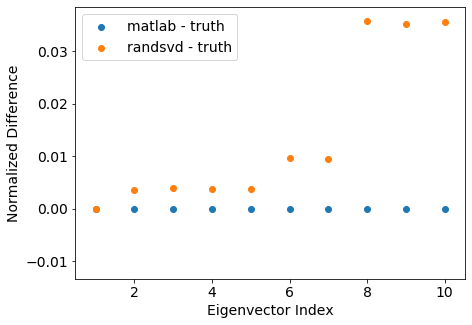

In [91]:
U_matlab_diff = np.zeros((1,10))
U_randsvd_diff = np.zeros((1,10))
for i in range(10):
    U_matlab_diff[0,i] = min(LA.norm(U_matlab[:,i] - U_truth[:,i]),LA.norm(-U_matlab[:,i]-U_truth[:,i]))
    U_randsvd_diff[0,i] = min(LA.norm(U_randsvd[:,i] - U_truth[:,i]),LA.norm(-U_randsvd[:,i]-U_truth[:,i]))

plt.figure(figsize=(7,5))
plt.scatter(np.linspace(1,10,10),U_matlab_diff,label='matlab - truth')
plt.scatter(np.linspace(1,10,10),U_randsvd_diff,label = 'randsvd - truth')
plt.xlabel('Eigenvector Index',fontsize=14)
plt.ylabel('Normalized Difference',fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=14)

In [57]:
U_truth

array([[-0.10672852, -0.08831585,  0.12181736,  0.12611384,  0.08249199,
        -0.01344456, -0.20879562, -0.18516828,  0.01684806, -0.00163225],
       [-0.10355703, -0.02369587,  0.15874595, -0.12004973,  0.01728624,
         0.18960333, -0.00659637,  0.10655632,  0.12913722,  0.01146507],
       [-0.09759571,  0.08843896,  0.07220351, -0.01097476, -0.17454607,
         0.00076552, -0.05507297,  0.07931577,  0.09099808,  0.18151801],
       [-0.09894011, -0.18626605,  0.02847446,  0.03889797,  0.07804253,
         0.19454351,  0.13308208,  0.10888386,  0.04492645, -0.03986293],
       [-0.09920396, -0.0803506 , -0.10040169, -0.07792121, -0.10061061,
         0.15063724,  0.06870837, -0.00903896,  0.12340107, -0.03707412],
       [-0.10584492, -0.07372267, -0.17843375, -0.07249053,  0.04544253,
        -0.05217806, -0.02433628,  0.16054085, -0.10218637,  0.21344594],
       [-0.09357563,  0.19202611,  0.08680149,  0.14340239, -0.06346709,
        -0.0835287 ,  0.00349659, -0.01108405

In [58]:
U_matlab

array([[ 0.10672852, -0.08831585, -0.12181736,  0.12611384, -0.08249199,
        -0.01344456,  0.20879562,  0.18516828,  0.01684806,  0.00163225],
       [ 0.10355703, -0.02369587, -0.15874595, -0.12004973, -0.01728624,
         0.18960333,  0.00659637, -0.10655632,  0.12913722, -0.01146507],
       [ 0.09759571,  0.08843896, -0.07220351, -0.01097476,  0.17454607,
         0.00076552,  0.05507297, -0.07931577,  0.09099808, -0.18151801],
       [ 0.09894011, -0.18626605, -0.02847446,  0.03889797, -0.07804253,
         0.19454351, -0.13308208, -0.10888386,  0.04492645,  0.03986293],
       [ 0.09920396, -0.0803506 ,  0.10040169, -0.07792121,  0.10061061,
         0.15063724, -0.06870837,  0.00903896,  0.12340107,  0.03707412],
       [ 0.10584492, -0.07372267,  0.17843375, -0.07249053, -0.04544253,
        -0.05217806,  0.02433628, -0.16054085, -0.10218637, -0.21344594],
       [ 0.09357563,  0.19202611, -0.08680149,  0.14340239,  0.06346709,
        -0.0835287 , -0.00349659,  0.01108405

In [59]:
U_randsvd

array([[ 1.06728525e-01,  8.84077596e-02, -1.21838693e-01,
         1.26249693e-01,  8.23951385e-02, -1.35588053e-02,
         2.08235105e-01, -1.86460443e-01, -1.60141998e-02,
        -2.60327574e-03],
       [ 1.03557026e-01,  2.40549290e-02, -1.58332664e-01,
        -1.19493540e-01,  1.69218363e-02,  1.89129444e-01,
         7.00960327e-03,  1.03175160e-01, -1.24562838e-01,
         1.03539936e-02],
       [ 9.75957102e-02, -8.82522797e-02, -7.21063010e-02,
        -1.11957290e-02, -1.74322582e-01, -1.36470376e-04,
         5.40893125e-02,  8.10761246e-02, -8.73579151e-02,
         1.82010288e-01],
       [ 9.89401150e-02,  1.85926162e-01, -2.87462840e-02,
         3.86845953e-02,  7.78287621e-02,  1.95567175e-01,
        -1.32119242e-01,  1.07236786e-01, -4.81186411e-02,
        -3.49194046e-02],
       [ 9.92039605e-02,  8.01785421e-02,  1.00373457e-01,
        -7.79017095e-02, -1.00801540e-01,  1.51486491e-01,
        -6.82752440e-02, -9.54205863e-03, -1.25384630e-01,
        -3.